# Analyze the intersection of BERT vocab and hypernyms in all datasets
* what's the ration ofhyponyms/hypernyms  in BERT? 
* what's the performance for hypernyms in and not in BERT vocab? 

## what's the obvious findings?
- hyponyms not in BERT vocab has a lower performance
- incorporating anchors reduce the gap between hyponyms in and not in BERT vocab
- 

In [1]:

import pandas as pd
pd.options.display.max_columns=500
pd.options.display.max_colwidth=1000
import matplotlib.pyplot as plt
from utils_plot import set_size

from collections import Counter, defaultdict
import seaborn as sns
from copy import deepcopy


In [2]:
def read_bert_vocab(bert_vocab_path = '../../data/bert-large-uncased-vocab.txt'):
    vocab = set()
    with open(bert_vocab_path, 'r') as fin: 
        lines = fin.readlines()
        for line in lines: 
            line = line.strip()
            vocab.add(line)
    return vocab       

# df = pd.read_csv(bert_vocab_path,  sep=" ") #header=None,
# df.columns = ['word']

In [3]:
bert_vocab = read_bert_vocab()
# path = '../data/hypernymysuite/data/hypernymsuite/SHWARTZ/IsA.jsonl'
# dataset_to_respath={
#     "hypernymsuite-BLESS": "log/bert-large-uncased/hypernymsuite/BLESS/exp_data_results_anchor_type_Coordinate_remove_Y_PUNC_FULL_concate_or_single_max_anchor_num_5_anchor_scorer_probAvg_filter_obj_True_filter_objects_with_input_True_wnp_True_cpt_False.HYPERNYMSUITE.csv",
#     "lm_diagnostic_extended-singular": "log/bert-large-uncased/lm_diagnostic_extended/singular/exp_data_results_anchor_type_Coordinate_remove_Y_PUNC_FULL_concate_or_single_max_anchor_num_5_anchor_scorer_probAvg_filter_obj_True_filter_objects_with_input_True_wnp_True_cpt_False.LM_DIAGNOSTIC_EXTENDED.csv",
#     "clsb-singular": "log/bert-large-uncased/clsb/singular/exp_data_results_anchor_type_Coordinate_remove_Y_PUNC_FULL_concate_or_single_max_anchor_num_5_anchor_scorer_probAvg_filter_obj_True_filter_objects_with_input_True_wnp_True_cpt_False.CLSB.csv",
#     "hypernymsuite-LEDS": "log/bert-large-uncased/hypernymsuite/LEDS/exp_data_results_anchor_type_Coordinate_remove_Y_PUNC_FULL_concate_or_single_max_anchor_num_5_anchor_scorer_probAvg_filter_obj_True_filter_objects_with_input_True_wnp_True_cpt_False.HYPERNYMSUITE.csv",
#     "hypernymsuite-EVAL": "log/bert-large-uncased/hypernymsuite/EVAL/exp_data_results_anchor_type_Coordinate_remove_Y_PUNC_FULL_concate_or_single_max_anchor_num_5_anchor_scorer_probAvg_filter_obj_True_filter_objects_with_input_True_wnp_True_cpt_False.HYPERNYMSUITE.csv",
#     "hypernymsuite-SHWARTZ": "log/bert-large-uncased/hypernymsuite/SHWARTZ/exp_data_results_anchor_type_Coordinate_remove_Y_PUNC_FULL_concate_or_single_max_anchor_num_5_anchor_scorer_probAvg_filter_obj_True_filter_objects_with_input_True_wnp_True_cpt_False.HYPERNYMSUITE.csv"}

# dataset_to_respath={
#     "hypernymsuite-BLESS": "log/bert-large-uncased/hypernymsuite/BLESS/exp_data_results_anchor_type_Coordinate_remove_Y_PUNC_FULL_concate_or_single_max_anchor_num_5_anchor_scorer_probAvg_filter_obj_True_filter_objects_with_input_True_wnp_False_cpt_False.HYPERNYMSUITE.csv",
#     "lm_diagnostic_extended-singular": "log/bert-large-uncased/lm_diagnostic_extended/singular/exp_data_results_anchor_type_Coordinate_remove_Y_PUNC_FULL_concate_or_single_max_anchor_num_5_anchor_scorer_probAvg_filter_obj_True_filter_objects_with_input_True_wnp_False_cpt_False.LM_DIAGNOSTIC_EXTENDED.csv",
#     "clsb-singular": "log/bert-large-uncased/clsb/singular/exp_data_results_anchor_type_Coordinate_remove_Y_PUNC_FULL_concate_or_single_max_anchor_num_5_anchor_scorer_probAvg_filter_obj_True_filter_objects_with_input_True_wnp_False_cpt_False.CLSB.csv",
#     "hypernymsuite-LEDS": "log/bert-large-uncased/hypernymsuite/LEDS/exp_data_results_anchor_type_Coordinate_remove_Y_PUNC_FULL_concate_or_single_max_anchor_num_5_anchor_scorer_probAvg_filter_obj_True_filter_objects_with_input_True_wnp_False_cpt_False.HYPERNYMSUITE.csv",
#     "hypernymsuite-EVAL": "log/bert-large-uncased/hypernymsuite/EVAL/exp_data_results_anchor_type_Coordinate_remove_Y_PUNC_FULL_concate_or_single_max_anchor_num_5_anchor_scorer_probAvg_filter_obj_True_filter_objects_with_input_True_wnp_False_cpt_False.HYPERNYMSUITE.csv",
#     "hypernymsuite-SHWARTZ": "log/bert-large-uncased/hypernymsuite/SHWARTZ/exp_data_results_anchor_type_Coordinate_remove_Y_PUNC_FULL_concate_or_single_max_anchor_num_5_anchor_scorer_probAvg_filter_obj_True_filter_objects_with_input_True_wnp_False_cpt_False.HYPERNYMSUITE.csv"
# }

from utils_path import dataset_to_respath
def get_dataset_to_respath(dataset_to_respath, print_flag=False):
    # remote path 
#     dataset_to_respath = {'hypernymsuite-BLESS': 'log/bert-large-uncased/hypernymsuite/BLESS/exp_data_results_anchor_type_Coordinate_remove_Y_PUNC_FULL_concate_or_single_max_anchor_num_10_anchor_scorer_probAvg_filter_obj_True_filter_objects_with_input_True_wnp_True_cpt_False.HYPERNYMSUITE.csv', 'lm_diagnostic_extended-singular': 'log/bert-large-uncased/lm_diagnostic_extended/singular/exp_data_results_anchor_type_Coordinate_remove_Y_PUNC_FULL_concate_or_single_max_anchor_num_10_anchor_scorer_probAvg_filter_obj_True_filter_objects_with_input_True_wnp_True_cpt_False.LM_DIAGNOSTIC_EXTENDED.csv', 'clsb-singular': 'log/bert-large-uncased/clsb/singular/exp_data_results_anchor_type_Coordinate_remove_Y_PUNC_FULL_concate_or_single_max_anchor_num_10_anchor_scorer_probAvg_filter_obj_True_filter_objects_with_input_True_wnp_True_cpt_False.CLSB.csv', 'hypernymsuite-LEDS': 'log/bert-large-uncased/hypernymsuite/LEDS/exp_data_results_anchor_type_Coordinate_remove_Y_PUNC_FULL_concate_or_single_max_anchor_num_10_anchor_scorer_probAvg_filter_obj_True_filter_objects_with_input_True_wnp_True_cpt_False.HYPERNYMSUITE.csv', 'hypernymsuite-EVAL': 'log/bert-large-uncased/hypernymsuite/EVAL/exp_data_results_anchor_type_Coordinate_remove_Y_PUNC_FULL_concate_or_single_max_anchor_num_10_anchor_scorer_probAvg_filter_obj_True_filter_objects_with_input_True_wnp_True_cpt_False.HYPERNYMSUITE.csv', 'hypernymsuite-SHWARTZ': 'log/bert-large-uncased/hypernymsuite/SHWARTZ/exp_data_results_anchor_type_Coordinate_remove_Y_PUNC_FULL_concate_or_single_max_anchor_num_10_anchor_scorer_probAvg_filter_obj_True_filter_objects_with_input_True_wnp_True_cpt_False.HYPERNYMSUITE.csv'}

    source_dir = 'spartan:~/cogsci/DAP/'
    target_dir = '../../'
    dataset_to_localpath = defaultdict()
    dataset_rename = {
        'hypernymsuite-BLESS': 'BLESS', 'lm_diagnostic_extended-singular': 'DIAG', 'clsb-singular':'CLSB', 'hypernymsuite-LEDS': 'LEDS', 'hypernymsuite-EVAL': 'EVAL', 'hypernymsuite-SHWARTZ': 
        "SHWARTZ"
    }
    for dataset, path in dataset_to_respath.items():
        path = path.replace(".tsv", ".csv")
        source_path = source_dir + path 
        dataset_l1 = dataset.split("-")[0]
        dataset_l2 = dataset.split("-")[1] 
        target_path = target_dir + path
        scp_string = f"!scp {source_path} {target_path}"
        if print_flag:
            print(scp_string)
            print()
#         print(target_path)
        dataset_to_localpath[dataset_rename[dataset]] = target_path 
#     print(dataset_to_localpath)
    return dataset_to_localpath
dataset_to_localpath = get_dataset_to_respath(dataset_to_respath)
# dataset_to_localpath

In [4]:
dataset_to_df = defaultdict()
dataset_to_stats = []
dataset_to_vocab_info = []
dataset_to_results = []
metrics = ['p10_def_sap', 'p10_def_dap', 'p10_lsp_sap',  'p10_lsp_dap', 'mrr_def_sap', 'mrr_def_dap', 'mrr_lsp_sap', 'mrr_lsp_dap']
for dataset, path in dataset_to_localpath.items(): 
    print(dataset, path)
#     if dataset!='SHWARTZ': continue 
    df = pd.read_csv(path)
    dataset_to_df[dataset] = df 
    
    df['obj_in_BERT'] = df['obj_label_sg'].apply(lambda x: 1 if eval(x)[0] in bert_vocab else 0)
    df['sub_in_BERT'] = df['sub_label_sg'].apply(lambda x: 1 if x in bert_vocab else 0)

    shared_num = df['obj_in_BERT'].sum()
    obj_shared_ratio = round(shared_num/len(df.index)*100, 1)
#     print(shared_num)
#     print("obj_in_BERT", obj_shared_ratio)
    # df.query("obj_in_BERT==0")

    shared_num = df['sub_in_BERT'].sum()
    sub_shared_ratio = round(shared_num/len(df.index)*100,1)
    print(shared_num)
#     print("sub_in_BERT", sub_shared_ratio)
    # df.query("sub_in_BERT==0")
    # [['sub_label_sg']]
    group = df.groupby('sub_in_BERT')[metrics].mean()
    group['dataset'] = dataset
    dataset_to_stats.append(group)
    
    group = df.groupby('obj_in_BERT')[['p10_def_sap', 'p10_def_dap', 'p10_lsp_sap',  'p10_lsp_dap']].mean()
    group['dataset'] = dataset
    dataset_to_results.append(group)
    
    dataset_to_vocab_info.append(pd.DataFrame(data={"dataset": dataset, 'sub_in_BERT': sub_shared_ratio, "obj_in_BERT": obj_shared_ratio},index=[dataset])) 
    
#     print("\n\n")
dataset_to_stats = pd.concat(dataset_to_stats)
display(dataset_to_stats)

dataset_to_results = pd.concat(dataset_to_results)
display(dataset_to_results.query("obj_in_BERT == 1"))

display(pd.concat(dataset_to_vocab_info))
print(pd.concat(dataset_to_vocab_info).to_latex())

BLESS ../../log/bert-large-uncased/hypernymsuite/BLESS/exp_data_results_anchor_type_Coordinate_remove_Y_PUNC_FULL_concate_or_single_max_anchor_num_5_anchor_scorer_probAvg_filter_obj_True_filter_objects_with_input_True_wnp_False_cpt_False.HYPERNYMSUITE.csv
793
DIAG ../../log/bert-large-uncased/lm_diagnostic_extended/singular/exp_data_results_anchor_type_Coordinate_remove_Y_PUNC_FULL_concate_or_single_max_anchor_num_5_anchor_scorer_probAvg_filter_obj_True_filter_objects_with_input_True_wnp_False_cpt_False.LM_DIAGNOSTIC_EXTENDED.csv
77
CLSB ../../log/bert-large-uncased/clsb/singular/exp_data_results_anchor_type_Coordinate_remove_Y_PUNC_FULL_concate_or_single_max_anchor_num_5_anchor_scorer_probAvg_filter_obj_True_filter_objects_with_input_True_wnp_False_cpt_False.CLSB.csv
679
LEDS ../../log/bert-large-uncased/hypernymsuite/LEDS/exp_data_results_anchor_type_Coordinate_remove_Y_PUNC_FULL_concate_or_single_max_anchor_num_5_anchor_scorer_probAvg_filter_obj_True_filter_objects_with_input_True_w

,p10_def_sap,p10_def_dap,p10_lsp_sap,p10_lsp_dap,mrr_def_sap,mrr_def_dap,mrr_lsp_sap,mrr_lsp_dap,dataset
sub_in_BERT,,,,,,,,,
0,0.338028,0.401408,0.528169,0.556338,0.218631,0.245079,0.278664,0.281489,BLESS
1,0.438840,0.484237,0.540984,0.527112,0.239365,0.259350,0.269167,0.262521,BLESS
0,0.643287,0.647295,0.635271,0.595190,0.409801,0.435923,0.429097,0.398742,DIAG
1,0.831169,0.831169,0.831169,0.831169,0.527958,0.578499,0.623444,0.616357,DIAG
0,0.652500,0.700000,0.695000,0.682500,0.359965,0.408437,0.425690,0.420915,CLSB
1,0.687776,0.708395,0.674521,0.674521,0.419741,0.431416,0.397998,0.394564,CLSB
0,0.591304,0.620290,0.594203,0.591304,0.304895,0.336241,0.331422,0.330966,LEDS
1,0.605234,0.651036,0.608506,0.624864,0.333339,0.364766,0.335260,0.343395,LEDS
0,0.333333,0.666667,0.666667,0.666667,0.111111,0.155556,0.276389,0.294444,EVAL


,p10_def_sap,p10_def_dap,p10_lsp_sap,p10_lsp_dap,dataset
obj_in_BERT,,,,,
1,0.423529,0.471658,0.539037,0.531551,BLESS
1,0.668403,0.671875,0.661458,0.626736,DIAG
1,0.674699,0.705283,0.682113,0.677479,CLSB
1,0.601426,0.642631,0.604596,0.615689,LEDS
1,0.466946,0.433368,0.394544,0.380902,EVAL
1,0.127947,0.135571,0.152153,0.148931,SHWARTZ


,dataset,sub_in_BERT,obj_in_BERT
BLESS,BLESS,84.8,100.0
DIAG,DIAG,13.4,100.0
CLSB,CLSB,62.9,100.0
LEDS,LEDS,72.7,100.0
EVAL,EVAL,99.4,100.0
SHWARTZ,SHWARTZ,42.8,100.0


\begin{tabular}{llrr}
\toprule
{} &  dataset &  sub\_in\_BERT &  obj\_in\_BERT \\
\midrule
BLESS   &    BLESS &         84.8 &        100.0 \\
DIAG    &     DIAG &         13.4 &        100.0 \\
CLSB    &     CLSB &         62.9 &        100.0 \\
LEDS    &     LEDS &         72.7 &        100.0 \\
EVAL    &     EVAL &         99.4 &        100.0 \\
SHWARTZ &  SHWARTZ &         42.8 &        100.0 \\
\bottomrule
\end{tabular}



<ipython-input-4-5a07b246a752>:45: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.concat(dataset_to_vocab_info).to_latex())


In [5]:
# dataset_to_df['CLSB'].columns 
width = 595 #600 #595
figsize=set_size(width, fraction=0.5)
print(figsize)

(4.116507541165076, 2.544141575385274)


## SUB in BERT 

{0: 50.0, 1: 50.0}
0 27.0 
1 20.200000000000003 
2 28.4 +
3 21.099999999999998 +
4 27.6 
5 24.0 *
6 27.200000000000003 
7 23.400000000000002 


,p10_def_sap,p10_def_dap,p10_lsp_sap,p10_lsp_dap,#instances,dataset
1,27.0,28.4,27.6,27.2,50.0,ALL
0,20.2,21.1,24.0,23.4,50.0,ALL


0 27.4 
1 25.6 
2 17.7 
3 15.0 
4 28.7 +
5 28.1 +
6 20.7 +
7 13.2 +
8 28.2 *
9 30.8 *
10 22.7 *
11 16.400000000000002 
12 27.700000000000003 +
13 29.6 +
14 23.0 
15 16.400000000000002 


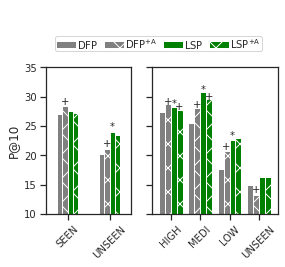

,metric,dataset,statistic,pvalue,significantly different,id,sub_in_BERT
0,p10_lsp_sap .vs p10_lsp_dap,ALL,1.750581,0.080054,False,ALL-0,0
0,p10_lsp_sap .vs p10_lsp_dap,ALL,1.364554,0.172429,False,ALL-1,1


In [8]:
from matplotlib import rcParams
rcParams['font.family'] = 'times'

sns.set(style="white") #_theme
sns.color_palette("husl", 8)
import math
import matplotlib.ticker as ticker

def plot_bar_freq_group(dataset, df, metrics, groupby_col, new_index, ax, markers, 
                        show_group_col_in_title=False, 
                        set_subplot_ylabel=False, subplot_ylabel=None,
                        ylim=None
                       ):
    group_means = []
    group_index = []
#     df_group = df.groupby(groupby_col)
#     df_group.sort_values(ascending=False)
    
    for name, group in df.groupby(groupby_col):
#     for name, group in df_group.items():
        group_mean = group[metrics].mean().to_frame().round(decimals = 3)*100#'ap10_sentence', 'ap10_sentence_dap',
        group_means.append(group_mean.T)
        group_index.append(name)

    group_means = pd.concat(group_means)
#     group_means['index'] = group_index 
#     group_means = group_means.sort_values('index', ascending=False)
    group_means.index = group_index
    
    group_means = group_means.filter(items = [1, 0], axis=0)
    sub_in_BERT_to_num = dict(df['sub_in_BERT'].value_counts(normalize=True))
    sub_in_BERT_to_num = {k: round(v*100,0) for k,v in sub_in_BERT_to_num.items()}
    print(sub_in_BERT_to_num)
    
    color = ['grey', 'grey', 'green', 'green']
    ax = group_means.plot(kind='bar', color= color, ax=ax, width=0.5, fontsize=10, ylim=ylim)#, ylim=(10, 35)) #, xticks=['FREQUENT', 'MEDIUM', 'LOW', 'UNSEEN'])

    for i, (container, hatch) in enumerate(zip(ax.containers, (" ", "x", " ", "x"))):
        if hatch!="x": continue 
        for patch in container.patches:
            patch.set_hatch(hatch)
            
    for i, bar in enumerate(ax.patches):
        print(i, bar.get_height(), markers[i] )
        if markers[i]=="": continue 
        ax.annotate(markers[i],
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()*0.98), ha='center', va='center',
                       size=10, 
                       xytext=(0, 8),
                       textcoords='offset points')
    if dataset != 'ALL': 
        if show_group_col_in_title:
            #ax.set_title(dataset + ": " + groupby_col)
            ax.set_title(dataset + f" ({math.ceil(sub_in_BERT_to_num[0])}%)" ) # + ": " + "-".join(groupby_col))
        else: ax.set_title(dataset)

    if set_subplot_ylabel:
        if subplot_ylabel is None:
            ax.set_ylabel(metrics[0].split("_")[0])
        else:
            ax.set_ylabel(subplot_ylabel)
            
    #     plt.savefig('')
    #     plt.legend(loc= (1,0.5))

    
    group_means['#instances'] = [sub_in_BERT_to_num[x] for x in [0, 1]]
    group_means['dataset'] = [dataset]*len(group_means.index)
    display(group_means)
    return ax 

metrics_group = [
#                 ['p1_def_sap', 'p1_def_dap'],
#                 [ 'p1_def_sap', 'p1_def_dap', 'p1_lsp_sap', 'p1_lsp_dap'],
                [ 'p10_def_sap', 'p10_def_dap', 'p10_lsp_sap', 'p10_lsp_dap'],
#                  [ 'p5_def_sap', 'p5_def_dap', 'p5_lsp_sap', 'p5_lsp_dap'],
#                  [ 'mrr_def_sap', 'mrr_def_dap', 'mrr_lsp_sap', 'mrr_lsp_dap'],
                ]
dataset_to_markers ={"DIAG": ['', '', '+', '', '', '', '+','x'],
                     "LEDS": ['', '', '+', '+', '', '', '+','+'],
                     "SHWARTZ": ['', '', '+', '+', '', '', 'x','x'],
                     "DIAG-LEDS": ['','', "+", '+', '','', "+", '+'],
                     #"ALL": ['', '', '+', '+', '','*', '', ''],
                     "ALL": ['', '', '+', '+', '', '*', '', '']
                     }

######################### PLOT the SEEN/UNSEEN Vocab from WordLex ##########

atom_datasets = ['BLESS', 'DIAG', 'CLSB','SHWARTZ', 'LEDS','EVAL']
dataset_to_df['ALL'] = pd.concat([dataset_to_df[dataset] for dataset in atom_datasets], axis=0)
sort_columns = [col for col in dataset_to_df['DIAG'].columns if col not in ['Unnamed: 0', 'uuid']]
dataset_to_df['ALL'] = dataset_to_df['ALL'][sort_columns].drop_duplicates(keep=False)

dataset_to_df['DIAG-LEDS'] = pd.concat([dataset_to_df['DIAG'], dataset_to_df['LEDS']], axis=0) #, 'LEDS'])
query_datasets = ['ALL'] #['DIAG-LEDS']# ["DIAG", 'LEDS'] #, "SHWARTZ"] #,   ]  #"BLESS", "CLSB", "EVAL"

############## set up the figure and axes 
# fig, axes = plt.subplots(1,len(query_datasets),sharey=True)

width = 610 #600 #595
fig, axes = plt.subplots(1,2,sharey=True, figsize=(4.15, 2.7), gridspec_kw={'width_ratios': [2, 3]})  #figsize=set_size(width, fraction=0.5)) #figsize=(5,3))#,

# if len(query_datasets)>1:
#     fig.set_size_inches(len(query_datasets)*2.5,2.5)
# else: 
#     fig.set_size_inches(4,3)
handles = []
for metrics in metrics_group: 
    for i, dataset in enumerate(query_datasets):
        df = dataset_to_df[dataset]
        ax = axes[i] if len(query_datasets)>1 or axes.size>1 else axes
        cut_labels=['0', '1']
        ax=plot_bar_freq_group(dataset, df, metrics, groupby_col = ['sub_in_BERT'], new_index=cut_labels, ax=ax, 
                               markers = dataset_to_markers[dataset],
                               set_subplot_ylabel=True if i==0 else False, subplot_ylabel='P@10',
                               ylim=(15,30),
                              ) #sub_in_BERT
        ax.set_xticklabels(['SEEN', 'UNSEEN'], rotation = 45)
        ax.get_legend().remove()
        ax.tick_params(
            axis='both',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=True,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=True,
            left=True #if dataset=='DIAG' else False
            
        ) # labels along the bottom edge are off
        ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
        handles.append(ax)
        
        
######################### PLOT the frequency from WordLex ##########
def plot_line_freq_group(dataset, group_means, metrics, groupby_col, 
                         ax, show_group_col_in_title=False, 
                         set_subplot_ylabel=False, subplot_ylabel=None, display_df=False, ylim=None):

    color = ['grey', 'grey', 'green', 'green']
    ax = group_means.plot(kind='line', color= color, ax=ax, 
                          style=['', 'x', '', 'x'], 
                          ylim=ylim, rot=0, lw=2, fontsize=10,
                         ) 

    if dataset!='ALL':
        if show_group_col_in_title:
            ax.set_title(dataset + ": " + groupby_col)
        else: ax.set_title(dataset  + f" ({ math.ceil(sub_freq_level_to_num['LOW']*100)}%)", fontsize=10)
    
#     if set_subplot_ylabel:
#         if subplot_ylabel is None:
#             ax.set_ylabel(metrics[0].split("_")[0])
#         else:
#             ax.set_ylabel(subplot_ylabel, fontsize=10 )
    if display_df:
        display(group_means)
    return ax, group_means

def plot_bar_freq_group(dataset, group_means, metrics, groupby_col, 
                         ax, show_group_col_in_title=False, 
                         set_subplot_ylabel=False, subplot_ylabel=None, display_df=False, ylim=None
                       ):

    color = ['grey', 'grey', 'green', 'green']
    ax = group_means.plot(kind='bar', color= color, ax=ax, 
                          style=[' ', 'x', ' ', 'x'], 
                          ylim=ylim)#, rot=rot) #, lw=2, fontsize=10,
                         #) 

    if dataset!='ALL':
        if show_group_col_in_title:
            ax.set_title(dataset + ": " + groupby_col)
        else: ax.set_title(dataset  + f" ({ math.ceil(sub_freq_level_to_num['LOW']*100)}%)", fontsize=10)
    
#     if set_subplot_ylabel:
#         if subplot_ylabel is None:
#             ax.set_ylabel(metrics[0].split("_")[0])
#         else:
#             ax.set_ylabel(subplot_ylabel, fontsize=10 )
    if display_df:
        display(group_means)
    return ax, group_means


metrics = ['p10_def_sap','p10_def_dap','p10_lsp_sap', 'p10_lsp_dap']
# df_freq = pd.read_csv("../log/paper_results/frequency_all_datasets.csv")#, names = ['freq_level', , '#instances', 'dataset'], header=None)

df_freq = pd.read_csv("../log/paper_results/frequency_all_datasets_raw.csv")
df_freq.index = df_freq['freq_level']
df_freq = df_freq[metrics]

# markers = ['', '', '', '+', '+', '+', '', '', '', 'x', '+', 'x']
# markers = ['', '', '', '+', '+', '+', '', '*', '*', 'x', '+', 'x']
# markers = ['', '', '', '+', '+', '+', '', '', '', 'x', '+', 'x']
# markers = ['', '', '', '+', '+', '+', '', '*', '*', '', '+', '']
#markers = ['', '', '', '+','','+', '','*', '*','','','' ] #[HIGH, M, L]
markers = ['', '', '','', '+', '+', '+','+', '*', '*', '*', '',  '+', '+', '',''] #['HIGH', 'M', 'L', 'UN']
ax2 = axes[1]
color = ['grey', 'grey', 'green', 'green']
ax2 = df_freq.plot(kind='bar', color= color, ax=ax2, 
                   width=0.8, fontsize=10, rot=45, ylim=(10, 35))#, ) #, xticks=['FREQUENT', 'MEDIUM', 'LOW', 'UNSEEN'])

for i, (container, hatch) in enumerate(zip(ax2.containers, (" ", "x", " ", "x"))):
    if hatch!="x": continue 
    for patch in container.patches:
        patch.set_hatch(hatch)

for i, bar in enumerate(ax2.patches):
    print(i, bar.get_height(), markers[i] )
    if markers[i]=="": continue 
    ax2.annotate(markers[i],
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()*0.97), ha='center', va='center',
                   size=10, 
                   xytext=(0, 8),
                   textcoords='offset points')

ax2.tick_params(
            axis='both',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=True,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=True,
            left=True #if dataset=='DIAG' else False
        ) # labels along the bottom edge are off
# ax2.get_xaxis().set_visible(False)
ax2.set(xlabel=None)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(5))

#keys: (1) use fig.lengend to create the lengend share across axes 
#(b) use borderaxespad to adjust the distance between lengend and axes 
labels=[r'$\mathregular{DFP}$', r'$\mathregular{DFP^{+A}}$', r'$\mathregular{LSP}$', r'$\mathregular{LSP^{+A}}$']
fig.legend(labels, ncol=len(labels), loc= 'center',bbox_to_anchor=(0.53, 1.15),
           fontsize='small', borderaxespad=-0.1,
           labelspacing=0.5, columnspacing=0.6,
           handletextpad=0.1,
           borderpad=0.1,
          )  #, bbox_to_anchor=(0, 1, 0.5, 0.1), ) loc='upper center', 
# axes[1].legend(labels=[r'$\mathregular{DFP}$', r'$\mathregular{DFP^{+A}}$', r'$\mathregular{LSP}$', r'$\mathregular{LSP^{+A}}$'],  
#            loc= (0,1.02), fontsize='x-small', ncol=4) # loc= (1.03,0.3), 
ax2.get_legend().remove()
# plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)

#plt.tight_layout()#pad=1.2)
plt.savefig('../log/paper_results/analysis/frequency_wordlex_vocab_in_bert.pdf', bbox_inches='tight')
plt.show()
#         plt.title(dataset + ": " + groupby_col)

############ SIGNIFICANCE TEST ##################
from significance_test import significance_test_multiple_datasets, significance_test_single_dataset
import json 
metrics =[
#               ['p10_def_sap', 'p10_def_dap'],
#           ['p10_def_sap', 'p10_lsp_sap'], 
          ['p10_lsp_sap', 'p10_lsp_dap'],
#           ['mrr_def_sap', 'mrr_lsp_sap'],
#           ['mrr_def_sap', 'mrr_def_dap'], 
#           ['mrr_lsp_sap', 'mrr_lsp_dap']
         ]

# query_datasets = ['BLESS', 'EVAL', 'SHWARTZ'] #list(dataset_to_localpath.keys())

dataset_to_df_test = {k:v for k,v in dataset_to_df.items() if k in query_datasets}
significance_test_stats = [] #defaultdict(dict)
for i, dataset in enumerate(query_datasets):
    df = dataset_to_df[dataset]
    for name, group in df.groupby(['sub_in_BERT']): #
        res=significance_test_single_dataset(group, dataset, metrics, min_pvalue =0.05, display_res=False) 
        res['id']= f"{dataset}-{name}"
        res['sub_in_BERT'] = name
        significance_test_stats.append(res)
        
significance_test_stats = pd.concat(significance_test_stats)
        
for name, group in significance_test_stats.groupby('dataset'):
    display(group.sort_values(['significantly different']))


In [18]:
markers_auto = ['', '',]

sig_diff = [significance_test_stats.query("metric == 'p10_def_sap .vs p10_def_dap' and sub_in_BERT==1")['significantly different'].values[0]
,
significance_test_stats.query("metric == 'p10_def_sap .vs p10_def_dap' and sub_in_BERT==0")['significantly different'].values[0]
,
significance_test_stats.query("metric == 'p10_def_sap .vs p10_lsp_sap' and sub_in_BERT==1")['significantly different'].values[0]
,
significance_test_stats.query("metric == 'p10_def_sap .vs p10_lsp_sap' and sub_in_BERT==0")['significantly different'].values[0]
,
significance_test_stats.query("metric == 'p10_lsp_sap .vs p10_lsp_dap' and sub_in_BERT==1")['significantly different'].values[0],
significance_test_stats.query("metric == 'p10_lsp_sap .vs p10_lsp_dap' and sub_in_BERT==0")['significantly different'].values[0]
]
markers_auto = ['', ''] + ['+' if flag else '' for flag in sig_diff]
# significance_test_stats.query("metric == 'p10_lsp_sap .vs p10_lsp_dap'")
markers = ['', '', '+', '+', '', '*', '', '']

[True, True, False, True, False, False]

In [8]:
# query= ['moa',  'swordtail', 'tragopan', "firetrap", 'jointer']
# for word in query:
#     if word not in bert_vocab:
#         print(word)

moa
swordtail
tragopan
firetrap
jointer


In [24]:
# dataset_to_df['SHWARTZ']['obj_label'] = dataset_to_df['SHWARTZ']['obj_label'].apply(lambda x: eval(x)[0] )
# for name, group in 
query_objs = ['film', 'album', 'village', 'city', 'company', 'town', 'band', 'river', 'place', 'book', 'organization', 'work', 'song', 'person', 'magazine', 'agent', 'species', 'island', 'single', 'mountain']
dfs = dataset_to_df['SHWARTZ'].query(f"obj_label in {query_objs}").groupby('obj_label').agg({'p10_def_sap': 'mean', 
                                                   'p10_def_dap': 'mean',
                                                   'p10_lsp_sap': 'mean',
                                                   'p10_lsp_dap': 'mean'})
dfs.sort_values(by='p10_def_dap', ascending=True)
# print(len(dfs.query("p10_def_dap==0").index))
# print(dfs.query("p10_def_dap==0").index)

,p10_def_sap,p10_def_dap,p10_lsp_sap,p10_lsp_dap
obj_label,,,,
single,0.000000,0.000000,0.000000,0.000000
album,0.001484,0.000742,0.008902,0.002967
film,0.004581,0.005890,0.018979,0.011126
agent,0.006711,0.006711,0.006711,0.000000
band,0.021978,0.018315,0.038462,0.021978
place,0.048930,0.024465,0.663609,0.522936
work,0.019231,0.033654,0.206731,0.100962
magazine,0.024390,0.036585,0.067073,0.042683
song,0.068063,0.057592,0.047120,0.047120


In [25]:
query_objs = ['wife', 'worker', 'yacht', 'city', 'town', 'company']
dataset_to_df['SHWARTZ'].query(f"obj_label in {query_objs}")[['sub_label_sg', 'obj_label', 'obj_mask_def_dap', 'subj_anchors_sg']]

,sub_label_sg,obj_label,obj_mask_def_dap,subj_anchors_sg
1,kerrobert,town,"['car', 'sausage', 'bicycle', 'shotgun', 'pastry', 'cannon', 'gun', 'sword', 'locomotive', 'surname']","['germany', 'french', 'robert', 'john', 'david']"
12,mclean,town,"['family', 'community', 'boat', 'ship', 'house', 'horse', 'country', 'car', 'group', 'organization']","['virginia', 'family', 'scotland', 'washington', 'canada']"
14,temecula,city,"['fruit', 'plant', 'flower', 'valve', 'vessel', 'pipe', 'container', 'vegetable', 'tube', 'seed']","['fruit', 'tube', 'valve', 'seed', 'derivative']"
15,benchmade,company,"['tool', 'toy', 'furniture', 'finish', 'model', 'instrument', 'product', 'kit', 'machine', 'bicycle']","['kit', 'prototype', 'accessory', 'finish', 'model']"
28,chevrolet,company,"['car', 'automobile', 'vehicle', 'truck', 'buick', 'pontiac', 'chevy', 'bicycle', 'suv', 'corvette']","['buick', 'pontiac', 'old', 'truck', 'car']"
...,...,...,...,...
12693,qihoo,company,"['muslim', 'tribe', 'clan', 'person', 'family', 'horse', 'boat', 'group', 'man', 'village']","['tribe', 'indian', 'tribal', 'muslim', 'india']"
12698,sonatrach,company,"['poem', 'fish', 'bird', 'tree', 'song', 'poetry', 'flower', 'instrument', 'guitar', 'plant']","['derivative', 'poem', 'hybrid', 'fish', 'twin']"
12701,dumas,city,"['book', 'writer', 'life', 'company', 'man', 'person', 'organization', 'corporation', 'woman', 'animal']","['company', 'man', 'author', 'book', 'life']"
12707,paladin,company,"['warrior', 'fighter', 'bodyguard', 'knight', 'superhero', 'soldier', 'magician', 'armor', 'mage', 'person']","['fighter', 'champion', 'hero', 'bodyguard', 'wizard']"


In [21]:
dft = dataset_to_df['SHWARTZ'].query("p10_def_dap ==0")[['sub_label_sg', 'obj_label', 'obj_mask_def_dap', 'subj_anchors_sg']]
# dft['obj_label'] = df['obj_label'].apply(lambda x: eval(x)[0])
# display(dft.head())
display( dft.query("obj_label == 'city'") ) 
# print(Counter(dft['obj_label']).most_common())
query_hyper = [x[0] for x in Counter(dataset_to_df['SHWARTZ']['obj_label']).most_common()]
print(query_hyper)

,sub_label_sg,obj_label,obj_mask_def_dap,subj_anchors_sg
14,temecula,city,"['fruit', 'plant', 'flower', 'valve', 'vessel', 'pipe', 'container', 'vegetable', 'tube', 'seed']","['fruit', 'tube', 'valve', 'seed', 'derivative']"
34,seneca,city,"['slave', 'indian', 'horse', 'person', 'cherokee', 'turtle', 'tribe', 'mohawk', 'animal', 'warrior']","['mohawk', 'cherokee', 'delaware', 'greek', 'slave']"
35,swan,city,"['bird', 'duck', 'crane', 'animal', 'goose', 'fish', 'pigeon', 'boat', 'butterfly', 'penguin']","['geese', 'duck', 'crane', 'eagle', 'penguin']"
36,dearing,city,"['honey', 'love', 'greeting', 'flower', 'letter', 'candy', 'cake', 'gift', 'relationship', 'marriage']","['dear', 'love', 'honey', 'darl', 'favorite']"
61,snellville,city,"['house', 'farmhouse', 'car', 'village', 'town', 'boat', 'hamlet', 'farm', 'building', 'bicycle']","['mt', 'ontario', 'pennsylvania', 'ny', 'virginia']"
...,...,...,...,...
12657,gibbon,city,"['animal', 'mammal', 'monkey', 'primate', 'bird', 'dog', 'cat', 'ape', 'mascot', 'lion']","['bear', 'snake', 'monkey', 'human', 'lion']"
12679,fasham,city,"['poem', 'song', 'deity', 'poetry', 'statue', 'idol', 'sculpture', 'music', 'shrine', 'dance']","['song', 'poem', 'idol', 'especially', 'etc']"
12680,valparaiso,city,"['car', 'bicycle', 'boat', 'chilean', 'canoe', 'locomotive', 'cheese', 'submarine', 'automobile', 'peruvian']","['chile', 'peru', 'california', 'chilean', 'french']"
12701,dumas,city,"['book', 'writer', 'life', 'company', 'man', 'person', 'organization', 'corporation', 'woman', 'animal']","['company', 'man', 'author', 'book', 'life']"


['film', 'album', 'village', 'city', 'company', 'town', 'band', 'river', 'place', 'book', 'organization', 'work', 'song', 'person', 'magazine', 'agent', 'species', 'island', 'single', 'mountain', 'organisation', 'ship', 'episode', 'country', 'language', 'settlement', 'newspaper', 'horse', 'artist', 'genre', 'lake', 'capital', 'municipality', 'airline', 'writer', 'human', 'university', 'port', 'painting', 'part', 'poet', 'sculpture', 'color', 'website', 'gene', 'device', 'region', 'state', 'play', 'disease', 'constellation', 'dish', 'letter', 'plantation', 'event', 'protein', 'composer', 'quality', 'system', 'activity', 'district', 'street', 'profession', 'peninsula', 'house', 'building', 'church', 'fabric', 'currency', 'list', 'area', 'athlete', 'soldier', 'condition', 'chemist', 'painter', 'character', 'collection', 'restaurant', 'software', 'concept', 'thought', 'metal', 'aircraft', 'opera', 'soul', 'subsidiary', 'change', 'side', 'architect', 'manga', 'leader', 'philosopher', 'compo

In [ ]:
### Significance Test


,metric,dataset,statistic,pvalue,significantly different,id,sub_in_BERT
0,p10_def_sap .vs p10_def_dap,DIAG-LEDS,-6.641053,5.577833e-11,True,DIAG-LEDS-0,0
1,p10_lsp_sap .vs p10_lsp_dap,DIAG-LEDS,-6.940489,7.794424e-12,True,DIAG-LEDS-0,0
0,p10_def_sap .vs p10_def_dap,DIAG-LEDS,-7.120393,2.062767e-12,True,DIAG-LEDS-1,1
1,p10_lsp_sap .vs p10_lsp_dap,DIAG-LEDS,-4.324609,1.682198e-05,True,DIAG-LEDS-1,1


## obj_in_BERT (line plot)

[0, 1]


,p10_def_sap,p10_def_dap,p10_lsp_sap,p10_lsp_dap,#instances,dataset
0,NaN,NaN,NaN,NaN,0.0,DIAG
1,66.8,76.7,66.1,74.7,1.0,DIAG


[0, 1]


,p10_def_sap,p10_def_dap,p10_lsp_sap,p10_lsp_dap,#instances,dataset
0,NaN,NaN,NaN,NaN,0.0,LEDS
1,60.1,67.6,60.5,64.9,1.0,LEDS


[0, 1]


,p10_def_sap,p10_def_dap,p10_lsp_sap,p10_lsp_dap,#instances,dataset
0,NaN,NaN,NaN,NaN,0.0,SHWARTZ
1,12.8,13.9,15.2,15.1,1.0,SHWARTZ


[0, 1]


,p10_def_sap,p10_def_dap,p10_lsp_sap,p10_lsp_dap,#instances,dataset
0,NaN,NaN,NaN,NaN,0.0,CLSB
1,67.5,71.3,68.2,68.8,1.0,CLSB


[0, 1]


,p10_def_sap,p10_def_dap,p10_lsp_sap,p10_lsp_dap,#instances,dataset
0,NaN,NaN,NaN,NaN,0.0,BLESS
1,42.4,47.4,53.9,53.9,1.0,BLESS


[0, 1]


,p10_def_sap,p10_def_dap,p10_lsp_sap,p10_lsp_dap,#instances,dataset
0,NaN,NaN,NaN,NaN,0.0,EVAL
1,46.7,45.6,39.5,39.8,1.0,EVAL


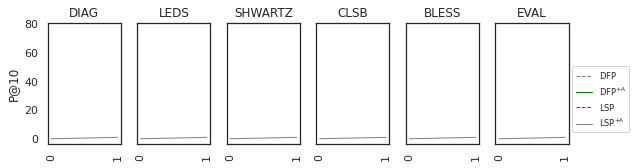

In [6]:
from matplotlib import rcParams
rcParams['font.family'] = 'times'

import seaborn as sns 
sns.set(style="white") #_theme
sns.color_palette("husl", 8)
import math


def plot_bar_freq_group(dataset, df, metrics, groupby_col, new_index, ax, show_group_col_in_title=False, set_subplot_ylabel=False, subplot_ylabel=None, display_df=False ):
    group_means = []
    group_index = []
    for name, group in df.groupby(groupby_col):
        group_mean = group[metrics].mean().to_frame().round(decimals = 3)*100#'ap10_sentence', 'ap10_sentence_dap',
        group_means.append(group_mean.T)
        group_index.append(name)

    group_means = pd.concat(group_means)
    group_means.index = group_index 
    group_means = group_means.reindex(new_index)

#     color = ['grey', 'grey', 'green', 'green']
    color = ['grey', 'blue', 'green', 'orange']
    ax = group_means.plot(kind='line', color= color, ax=ax)#, width=0.8) #, xticks=['HIGH', 'MEDI', 'LOW', 'UNSEEN'])
#     for metric in metrics: 
#         ax = ax.plot(group_means.index, groups_means[metric], 'r--')
        
#     for i, (container, hatch) in enumerate(zip(ax.containers, ("", "-", " ", "-"))):
    for i, (container, hatch) in enumerate(zip(ax.containers, ("--", "-", "--", "-"))):
        if len(hatch)==0: hatch=None 
        for patch in container.patches:
            patch.set_hatch(hatch)
#     plt.legend(loc= (1,0.5))
    if show_group_col_in_title:
        ax.set_title(dataset + ": " + groupby_col)
    else: ax.set_title(dataset)
        
    if set_subplot_ylabel:
        if subplot_ylabel is None:
            ax.set_ylabel(metrics[0].split("_")[0])
        else:
            ax.set_ylabel(subplot_ylabel)
#     plt.savefig('')

    sub_in_BERT_to_num = dict(df['obj_in_BERT'].value_counts())
    group_means['#instances'] = [sub_in_BERT_to_num[x] for x in new_index]
    group_means['dataset'] = [dataset]*len(new_index)
    if display_df:
        display(group_means)
    return ax 

def plot_by_datasets():
    metrics_group = [
    #                 ['p1_def_sap', 'p1_def_dap'],
    #                 [ 'p1_def_sap', 'p1_def_dap', 'p1_lsp_sap', 'p1_lsp_dap'],
    #                  [ 'p5_def_sap', 'p5_def_dap', 'p5_lsp_sap', 'p5_lsp_dap'],
    #                  [ 'p10_def_sap', 'p10_def_dap', 'p10_lsp_sap', 'p10_lsp_dap'],
                     [ 'mrr_def_sap', 'mrr_def_dap', 'mrr_lsp_sap', 'mrr_lsp_dap'],
                    ]

    new_index = ['HIGH', 'MEDI', 'LOW', 'UNSEEN']
    for dataset, df in dataset_to_df.items():
        for metrics in metrics_group: 
            fig, (ax1, ax2) = plt.subplots(1,2,sharey=True)
            fig.set_size_inches(8, 3)
            ax1=plot_bar_freq_group(dataset, df, metrics, groupby_col = 'obj_in_BERT', new_index=new_index, ax=ax1)
            ax2=plot_bar_freq_group(dataset, df, metrics, groupby_col = 'obj_freq_level', new_index=new_index, ax=ax2)
#             ax1.get_legend().remove()
            plt.legend(loc= (1,0.3))
    #         plt.tight_layout()
            plt.show()
    #         plt.title(dataset + ": " + groupby_col)
    #         plt.savefig('')
  
def plot_line_freq_group(dataset, df, metrics, groupby_col, new_index, ax, show_group_col_in_title=False, set_subplot_ylabel=False, subplot_ylabel=None, display_df=False, ylim=None ):
    group_means = []
    group_index = []
    for name, group in df.groupby(groupby_col):
        group_mean = group[metrics].mean().to_frame().round(decimals = 3)*100#'ap10_sentence', 'ap10_sentence_dap',
        group_means.append(group_mean.T)
        group_index.append(name)

    group_means = pd.concat(group_means)
    group_means.index = group_index 
    group_means = group_means.reindex(new_index)
    sub_in_BERT_to_num = dict(df['obj_in_BERT'].value_counts(normalize=True))
    group_means['#instances'] = [sub_in_BERT_to_num.get(x, 0) for x in new_index]

    color = ['grey', 'green', 'green', 'grey']
#     ylim = (math.ceil(min(group_means[metrics].min())), 
#     metrics_min = 40
#     metrics_max = math.ceil(max(group_means[metrics].max())) 
#     ylim= (metrics_min, metrics_max)
#     yticks = [i for i in range(metrics_min, metrics_max, 10)]
    ax = group_means.plot(kind='line', color= color, ax=ax, style=['--', '-', '--', '-'], ylim=ylim, rot=90, lw=1) #,ylim=ylim, yticks=yticks)
#     ax.set_ylabelticks(new_index)
    if show_group_col_in_title:
        ax.set_title(dataset + ": " + groupby_col)
    else: ax.set_title(dataset)
        
    if set_subplot_ylabel:
        if subplot_ylabel is None:
            ax.set_ylabel(metrics[0].split("_")[0])
        else:
            ax.set_ylabel(subplot_ylabel)


    
    
    
    group_means['dataset'] = [dataset]*len(new_index)
    if display_df:
        display(group_means)
    return ax, group_means


metrics_group = [
#                 ['p1_def_sap', 'p1_def_dap'],
#                 [ 'p1_def_sap', 'p1_def_dap',  'p1_lsp_dap'], #'p1_lsp_sap',
#                  [ 'p5_def_sap', 'p5_def_dap', 'p5_lsp_sap', 'p5_lsp_dap'],
                 [ 'p10_def_sap',  'p10_def_dap', 'p10_lsp_sap', 'p10_lsp_dap'], 
#                  [ 'mrr_def_sap', 'mrr_def_dap', 'mrr_lsp_sap', 'mrr_lsp_dap'],
                ]

new_index = ['HIGH', 'MEDI', 'LOW', 'UNSEEN']
merge_unseen_low= True #False #True
query_datasets = ["DIAG",  'LEDS', 'SHWARTZ', 'CLSB', 'BLESS', 'EVAL'] 
for metrics in metrics_group: 
#     fig, axes = plt.subplots(1,5,sharey=False)
    fig, axes = plt.subplots(1,len(query_datasets),sharey=True)
    fig.set_size_inches(len(query_datasets)*1.5, 2.5)
    i=0
    for dataset in query_datasets:
        df = dataset_to_df[dataset]
#         if dataset in ['BLESS',  'CLSB', 'EVAL']:#, 'CLSB'] : #== : 'EVAL', 'EVAL',,'CLSB'SHWARTZ
#             continue 
        ax1 = axes[i]
        new_index = [0, 1 ]
            #         ax2 = axes[1][i]
        
        print(new_index)
        ax1, group_means =plot_line_freq_group(dataset, df, metrics, 
                                               groupby_col = 'obj_in_BERT', 
                                               new_index=new_index, ax=ax1, 
                                               show_group_col_in_title=False, 
                                               set_subplot_ylabel=True if i==0 else False, 
                                               subplot_ylabel='P@10', 
                                               display_df=True, 
                                               ylim=None)
#                                                ylim=(1,100))
                                
#         ax2=plot_bar_freq_group(dataset, df, metrics, groupby_col = 'obj_freq_level', new_index=new_index, ax=ax2)
#         ax1.set_xticklabels(['HIGH', 'MEDI', 'LOW'], rotation = 45)
#         ax1.set_xticklabels([0, 1], rotation = 45)
#         ax1.set_xticklabels(['unseen', 'seen'], rotation = 45)
        ax1.get_legend().remove()
        
#         ax1.set_xticklabels(new_index,  fontsize='small') #rotation = 60,
        i +=1
#         ax2.get_legend().remove()
#     yyl=plt.ylabel(r'P@1')
#     yyl.set_position((yyl.get_position()[0],0)) # This says use the top of the bottom axis as the reference point.
#     yyl.set_verticalalignment('center')

    plt.legend(labels=[r'$\mathregular{DFP}$', r'$\mathregular{DFP^{+A}}$', r'$\mathregular{LSP}$', r'$\mathregular{LSP^{+A}}$'], 
                loc= (1.05,0.1), fontsize='x-small',ncol=1) #, ncol=len(df.columns))  prop={'size': 6}, 
    plt.tight_layout()
    plt.savefig("../log/paper_results/analysis/frequency_bert_hypernym.pdf")
    plt.show()

## obj_in_BERT (barplot)

{1: 70.0, 0: 30.0}
{1: 82.0, 0: 18.0}
{1: 98.0, 0: 2.0}
{1: 91.0, 0: 9.0}
{1: 100.0, 0: 0.0}


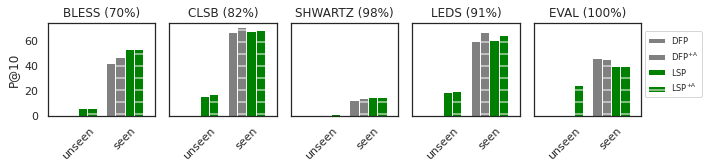

In [40]:
from matplotlib import rcParams
rcParams['font.family'] = 'times'

sns.set(style="white") #_theme
sns.color_palette("husl", 8)
import math

def plot_bar_freq_group(dataset, df, metrics, groupby_col, new_index, ax, show_group_col_in_title=False, set_subplot_ylabel=False, subplot_ylabel=None):
    group_means = []
    group_index = []
    for name, group in df.groupby(groupby_col):
        group_mean = group[metrics].mean().to_frame().round(decimals = 3)*100#'ap10_sentence', 'ap10_sentence_dap',
        group_means.append(group_mean.T)
        group_index.append(name)

    group_means = pd.concat(group_means)
    group_means.index = group_index 
#     display(group_means)
    group_means = group_means.filter(items = [0, 1], axis=0)
    obj_in_BERT_to_num = dict(df['obj_in_BERT'].value_counts(normalize=True))
    obj_in_BERT_to_num = {k: round(v*100,0) for k,v in obj_in_BERT_to_num.items()}
    print(obj_in_BERT_to_num)
    
#     new_index = ['FREQUENT', 'MEDIUM', 'LOW', 'UNSEEN']
#     group_means = group_means.reindex(new_index)
    color = ['grey', 'grey', 'green', 'green']

    ax = group_means.plot(kind='bar', color= color, ax=ax, width=0.8 ) #, xticks=['FREQUENT', 'MEDIUM', 'LOW', 'UNSEEN'])

    for i, (container, hatch) in enumerate(zip(ax.containers, (" ", "-", " ", "-"))):
        if hatch!="-": continue 
        for patch in container.patches:
            patch.set_hatch(hatch)
            
    if show_group_col_in_title:
        ax.set_title(dataset + ": " + groupby_col)
    else: ax.set_title(dataset)
        
    if set_subplot_ylabel:
        if subplot_ylabel is None:
            ax.set_ylabel(metrics[0].split("_")[0])
        else:
            ax.set_ylabel(subplot_ylabel)
            
    ax.set_title(dataset + f" ({math.ceil(obj_in_BERT_to_num[1])}%)" ) # + ": " + "-".join(groupby_col))
    #     plt.savefig('')
    #     plt.legend(loc= (1,0.5))

    
    group_means['#instances'] = [obj_in_BERT_to_num.get(x, 0) for x in [0, 1]]
    group_means['dataset'] = [dataset]*len(group_means.index)
#     display(group_means)
    return ax 

metrics_group = [
#                 ['p1_def_sap', 'p1_def_dap'],
#                 [ 'p1_def_sap', 'p1_def_dap', 'p1_lsp_sap', 'p1_lsp_dap'],
                [ 'p10_def_sap', 'p10_def_dap', 'p10_lsp_sap', 'p10_lsp_dap'],
#                  [ 'p5_def_sap', 'p5_def_dap', 'p5_lsp_sap', 'p5_lsp_dap'],
#                  [ 'mrr_def_sap', 'mrr_def_dap', 'mrr_lsp_sap', 'mrr_lsp_dap'],
                ]

query_datasets = ["BLESS",  "CLSB",  "SHWARTZ", 'LEDS', "EVAL"]  # "DIAG",
fig, axes = plt.subplots(1,len(query_datasets),sharey=True)
fig.set_size_inches(10,2.5)
for metrics in metrics_group: 
    for i, dataset in enumerate(query_datasets):
        df = dataset_to_df[dataset]
        ax = axes[i]
        cut_labels=['0', '1']
        ax=plot_bar_freq_group(dataset, df, metrics, groupby_col = ['obj_in_BERT'], new_index=cut_labels, ax=ax, set_subplot_ylabel=True if i==0 else False, subplot_ylabel='P@10') #obj_in_BERT
        ax.set_xticklabels(['unseen', 'seen'], rotation = 45)
        ax.get_legend().remove()
    plt.legend(labels=[r'$\mathregular{DFP}$', r'$\mathregular{DFP^{+A}}$', r'$\mathregular{LSP}$', r'$\mathregular{LSP^{+A}}$'],  loc= (1.03,0.2), fontsize='x-small') # loc= (1.03,0.3), 
    
    plt.tight_layout()
    plt.savefig('../log/paper_results/analysis/bert_hypernym_barplot.pdf')
    plt.show()
#         plt.title(dataset + ": " + groupby_col)


In [52]:
if 'reptiles' in bert_vocab:
    print("yes")
else:
    print("no")

yes


In [54]:
dataset_to_df['CLSB'].query("obj_in_BERT==0 and p10_lsp_dap==1")[['sub_label', 'obj_label', 'obj_mask_def_sap', 'obj_mask_lsp_sap', 'p10_def_sap', 'p10_lsp_sap']]

,sub_label,obj_label,obj_mask_def_sap,obj_mask_lsp_sap,p10_def_sap,p10_lsp_sap
1,alligators,['reptile'],"['fish', 'animal', 'turtle', 'crocodile', 'snake', 'lizard', 'monster', 'bird', 'mammal', 'frog']","['reptile', 'animal', 'snake', 'thing', 'wildlife', 'fish', 'predator', 'creature', 'species', 'lizard']",0,1
76,beavers,['rodent'],"['animal', 'mammal', 'otter', 'dog', 'bear', 'wolf', 'bird', 'fish', 'weasel', 'deer']","['animal', 'mammal', 'wildlife', 'species', 'creature', 'rodent', 'fish', 'bird', 'thing', 'predator']",0,1
100,blenders,['appliance'],"['mixer', 'machine', 'refrigerator', 'compressor', 'filter', 'device', 'toilet', 'container', 'tool', 'computer']","['appliance', 'equipment', 'chemical', 'device', 'tool', 'product', 'machine', 'filter', 'accessory', 'thing']",0,1
228,centipedes,['invertebrate'],"['worm', 'insect', 'spider', 'scorpion', 'animal', 'bug', 'fish', 'snake', 'mammal', 'slug']","['insect', 'spider', 'reptile', 'animal', 'invertebrate', 'creature', 'worm', 'beetle', 'parasite', 'thing']",0,1
254,chipmunks,['rodent'],"['dog', 'animal', 'bird', 'mammal', 'mouse', 'toy', 'monkey', 'rabbit', 'puppy', 'cat']","['animal', 'pet', 'rodent', 'toy', 'child', 'bird', 'creature', 'squirrel', 'story', 'kid']",0,1
329,crocodiles,['reptile'],"['animal', 'fish', 'bird', 'mammal', 'lizard', 'snake', 'turtle', 'monster', 'creature', 'human']","['reptile', 'animal', 'fish', 'snake', 'creature', 'wildlife', 'thing', 'predator', 'species', 'mammal']",0,1
374,dishwashers,['appliance'],"['machine', 'refrigerator', 'mixer', 'robot', 'sink', 'vacuum', 'toilet', 'oven', 'cleaner', 'computer']","['appliance', 'equipment', 'machine', 'device', 'tool', 'machinery', 'thing', 'accessory', 'item', 'yes']",0,1
463,fridges,['appliance'],"['refrigerator', 'kitchen', 'building', 'machine', 'house', 'door', 'laboratory', 'tank', 'wall', 'cabinet']","['appliance', 'thing', 'cabinet', 'equipment', 'refrigerator', 'item', 'container', 'furniture', 'sink', 'storage']",0,1
479,gerbils,['rodent'],"['dog', 'rabbit', 'mammal', 'weasel', 'squirrel', 'animal', 'monkey', 'pig', 'canine', 'cat']","['animal', 'mammal', 'rodent', 'pet', 'dog', 'wildlife', 'livestock', 'cat', 'bird', 'reptile']",0,1
528,hamsters,['rodent'],"['dog', 'animal', 'cat', 'mammal', 'rat', 'mouse', 'bird', 'rabbit', 'monkey', 'human']","['rodent', 'animal', 'cat', 'mammal', 'rat', 'mouse', 'pet', 'dog', 'thing', 'species']",0,1


## sub_in_BERT (PLOT line)

[0, 1]


,p10_def_sap,p10_lsp_sap,p10_lsp_dap,p10_def_dap,#instances,dataset
0,64.3,63.5,72.5,75.2,0.866319,DIAG
1,83.1,83.1,88.3,87.0,0.133681,DIAG


[0, 1]


,p10_def_sap,p10_lsp_sap,p10_lsp_dap,p10_def_dap,#instances,dataset
0,59.1,59.4,64.6,64.6,0.273376,LEDS
1,60.5,60.9,65.0,68.7,0.726624,LEDS


[0, 1]


,p10_def_sap,p10_lsp_sap,p10_lsp_dap,p10_def_dap,#instances,dataset
0,12.8,16.7,16.6,13.6,0.571597,SHWARTZ
1,12.8,13.2,13.1,14.4,0.428403,SHWARTZ


[0, 1]


,p10_def_sap,p10_lsp_sap,p10_lsp_dap,p10_def_dap,#instances,dataset
0,65.2,69.5,69.2,70.8,0.370714,CLSB
1,68.8,67.5,68.5,71.6,0.629286,CLSB


[0, 1]


,p10_def_sap,p10_lsp_sap,p10_lsp_dap,p10_def_dap,#instances,dataset
0,33.8,52.8,54.9,43.0,0.151872,BLESS
1,43.9,54.1,53.7,48.2,0.848128,BLESS


[0, 1]


,p10_def_sap,p10_lsp_sap,p10_lsp_dap,p10_def_dap,#instances,dataset
0,33.3,66.7,66.7,50.0,0.006296,EVAL
1,46.8,39.3,39.6,45.6,0.993704,EVAL


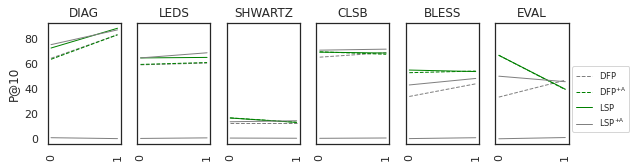

In [7]:
from matplotlib import rcParams
rcParams['font.family'] = 'times'

import seaborn as sns 
sns.set(style="white") #_theme
sns.color_palette("husl", 8)
import math


def plot_bar_freq_group(dataset, df, metrics, groupby_col, new_index, ax, show_group_col_in_title=False, set_subplot_ylabel=False, subplot_ylabel=None, display_df=False ):
    group_means = []
    group_index = []
    for name, group in df.groupby(groupby_col):
        group_mean = group[metrics].mean().to_frame().round(decimals = 3)*100#'ap10_sentence', 'ap10_sentence_dap',
        group_means.append(group_mean.T)
        group_index.append(name)

    group_means = pd.concat(group_means)
    group_means.index = group_index 
    group_means = group_means.reindex(new_index)

#     color = ['grey', 'grey', 'green', 'green']
    color = ['grey', 'blue', 'green', 'orange']
    ax = group_means.plot(kind='line', color= color, ax=ax)#, width=0.8) #, xticks=['HIGH', 'MEDI', 'LOW', 'UNSEEN'])
#     for metric in metrics: 
#         ax = ax.plot(group_means.index, groups_means[metric], 'r--')
        
#     for i, (container, hatch) in enumerate(zip(ax.containers, ("", "-", " ", "-"))):
    for i, (container, hatch) in enumerate(zip(ax.containers, ("--", "-", "--", "-"))):
        if len(hatch)==0: hatch=None 
        for patch in container.patches:
            patch.set_hatch(hatch)
#     plt.legend(loc= (1,0.5))
    if show_group_col_in_title:
        ax.set_title(dataset + ": " + groupby_col)
    else: ax.set_title(dataset)
        
    if set_subplot_ylabel:
        if subplot_ylabel is None:
            ax.set_ylabel(metrics[0].split("_")[0])
        else:
            ax.set_ylabel(subplot_ylabel)
#     plt.savefig('')

    sub_in_BERT_to_num = dict(df['sub_in_BERT'].value_counts())
    group_means['#instances'] = [sub_in_BERT_to_num[x] for x in new_index]
    group_means['dataset'] = [dataset]*len(new_index)
    if display_df:
        display(group_means)
    return ax 

def plot_by_datasets():
    metrics_group = [
    #                 ['p1_def_sap', 'p1_def_dap'],
    #                 [ 'p1_def_sap', 'p1_def_dap', 'p1_lsp_sap', 'p1_lsp_dap'],
    #                  [ 'p5_def_sap', 'p5_def_dap', 'p5_lsp_sap', 'p5_lsp_dap'],
    #                  [ 'p10_def_sap', 'p10_def_dap', 'p10_lsp_sap', 'p10_lsp_dap'],
                     [ 'mrr_def_sap', 'mrr_def_dap', 'mrr_lsp_sap', 'mrr_lsp_dap'],
                    ]

    new_index = ['HIGH', 'MEDI', 'LOW', 'UNSEEN']
    for dataset, df in dataset_to_df.items():
        for metrics in metrics_group: 
            fig, (ax1, ax2) = plt.subplots(1,2,sharey=True)
            fig.set_size_inches(8, 3)
            ax1=plot_bar_freq_group(dataset, df, metrics, groupby_col = 'sub_in_BERT', new_index=new_index, ax=ax1)
            ax2=plot_bar_freq_group(dataset, df, metrics, groupby_col = 'obj_freq_level', new_index=new_index, ax=ax2)
#             ax1.get_legend().remove()
            plt.legend(loc= (1,0.3))
    #         plt.tight_layout()
            plt.show()
    #         plt.title(dataset + ": " + groupby_col)
    #         plt.savefig('')
  
def plot_line_freq_group(dataset, df, metrics, groupby_col, new_index, ax, show_group_col_in_title=False, set_subplot_ylabel=False, subplot_ylabel=None, display_df=False, ylim=None ):
    group_means = []
    group_index = []
    for name, group in df.groupby(groupby_col):
        group_mean = group[metrics].mean().to_frame().round(decimals = 3)*100#'ap10_sentence', 'ap10_sentence_dap',
        group_means.append(group_mean.T)
        group_index.append(name)

    group_means = pd.concat(group_means)
    group_means.index = group_index 
    group_means = group_means.reindex(new_index)
    sub_in_BERT_to_num = dict(df['sub_in_BERT'].value_counts(normalize=True))
    group_means['#instances'] = [sub_in_BERT_to_num[x] for x in new_index]

    color = ['grey', 'green', 'green', 'grey']
#     ylim = (math.ceil(min(group_means[metrics].min())), 
#     metrics_min = 40
#     metrics_max = math.ceil(max(group_means[metrics].max())) 
#     ylim= (metrics_min, metrics_max)
#     yticks = [i for i in range(metrics_min, metrics_max, 10)]
    ax = group_means.plot(kind='line', color= color, ax=ax, style=['--', '--', '-', '-'], ylim=ylim, rot=90, lw=1) #,ylim=ylim, yticks=yticks)
#     ax.set_ylabelticks(new_index)
    if show_group_col_in_title:
        ax.set_title(dataset + ": " + groupby_col)
    else: ax.set_title(dataset)
        
    if set_subplot_ylabel:
        if subplot_ylabel is None:
            ax.set_ylabel(metrics[0].split("_")[0])
        else:
            ax.set_ylabel(subplot_ylabel)


    
    
    
    group_means['dataset'] = [dataset]*len(new_index)
    if display_df:
        display(group_means)
    return ax, group_means


metrics_group = [
#                 ['p1_def_sap', 'p1_def_dap'],
#                 [ 'p1_def_sap', 'p1_def_dap',  'p1_lsp_dap'], #'p1_lsp_sap',
#                  [ 'p5_def_sap', 'p5_def_dap', 'p5_lsp_sap', 'p5_lsp_dap'],
                 [ 'p10_def_sap', 'p10_lsp_sap', 'p10_lsp_dap','p10_def_dap'], 
#                  [ 'mrr_def_sap', 'mrr_def_dap', 'mrr_lsp_sap', 'mrr_lsp_dap'],
                ]

new_index = ['HIGH', 'MEDI', 'LOW', 'UNSEEN']
merge_unseen_low= True #False #True
query_datasets = ["DIAG",  'LEDS', 'SHWARTZ', 'CLSB', 'BLESS', 'EVAL'] 
for metrics in metrics_group: 
#     fig, axes = plt.subplots(1,5,sharey=False)
    fig, axes = plt.subplots(1,len(query_datasets),sharey=True)
    fig.set_size_inches(len(query_datasets)*1.5, 2.5)
    i=0
    for dataset in query_datasets:
        df = dataset_to_df[dataset]
#         if dataset in ['BLESS',  'CLSB', 'EVAL']:#, 'CLSB'] : #== : 'EVAL', 'EVAL',,'CLSB'SHWARTZ
#             continue 
        ax1 = axes[i]
        new_index = [0, 1 ]
            #         ax2 = axes[1][i]
        
        print(new_index)
        ax1, group_means =plot_line_freq_group(dataset, df, metrics, 
                                               groupby_col = 'sub_in_BERT', 
                                               new_index=new_index, ax=ax1, 
                                               show_group_col_in_title=False, 
                                               set_subplot_ylabel=True if i==0 else False, 
                                               subplot_ylabel='P@10', 
                                               display_df=True, 
                                               ylim=None)
#                                                ylim=(1,100))
                                
#         ax2=plot_bar_freq_group(dataset, df, metrics, groupby_col = 'obj_freq_level', new_index=new_index, ax=ax2)
#         ax1.set_xticklabels(['HIGH', 'MEDI', 'LOW'], rotation = 45)
#         ax1.set_xticklabels([0, 1], rotation = 45)
#         ax1.set_xticklabels(['unseen', 'seen'], rotation = 45)
        ax1.get_legend().remove()
        
#         ax1.set_xticklabels(new_index,  fontsize='small') #rotation = 60,
        i +=1
#         ax2.get_legend().remove()
#     yyl=plt.ylabel(r'P@1')
#     yyl.set_position((yyl.get_position()[0],0)) # This says use the top of the bottom axis as the reference point.
#     yyl.set_verticalalignment('center')

    plt.legend(labels=[r'$\mathregular{DFP}$', r'$\mathregular{DFP^{+A}}$', r'$\mathregular{LSP}$', r'$\mathregular{LSP^{+A}}$'], 
                loc= (1.05,0.1), fontsize='x-small',ncol=1) #, ncol=len(df.columns))  prop={'size': 6}, 
    plt.tight_layout()
    plt.savefig("../log/paper_results/analysis/frequency_bert_hyponym.pdf")
    plt.show()

## sub_in_BERT (barplot)

{1: 85.0, 0: 15.0}
{0: 87.0, 1: 13.0}
{1: 62.0, 0: 38.0}
{0: 57.0, 1: 43.0}
{1: 72.0, 0: 28.0}
{1: 99.0, 0: 1.0}


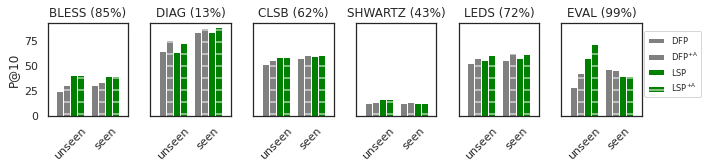

## observations: 

- unseen <= seen 
- unseen hyponym: LSP >= DFP
- seen hyponym: LSP ≈ DFP 

- + anchors: retuce the gap between in/out groups 

- EVAL is different from other datasets

In [38]:
display(dataset_to_df['EVAL'].query("sub_in_BERT ==0")[['p10_def_sap', 'p10_def_dap', 'p10_lsp_sap', 'p10_lsp_dap']].mean())
dataset_to_df['EVAL'].query("sub_in_BERT ==1 & p10_lsp_sap==0 and p10_lsp_dap==1")[['sub_label_sg', 'obj_label_sg', 'subj_anchors']]

p10_def_sap    0.285714
p10_def_dap    0.428571
p10_lsp_sap    0.571429
p10_lsp_dap    0.714286
dtype: float64

,sub_label_sg,obj_label_sg,subj_anchors
19,answer,['statement'],"['solutions', 'responses', 'replies', 'questions', 'comments', 'explanations', 'understanding', 'truth', 'lies', 'notes']"
43,ball,['baseball'],"['nuts', 'teeth', 'softball', 'heads', 'strikes', 'ribs', 'nets', 'man', 'games', 'pins']"
45,ball,['sport'],"['nuts', 'teeth', 'softball', 'heads', 'strikes', 'ribs', 'nets', 'man', 'games', 'pins']"
52,bar,['business'],"['restaurants', 'clubs', 'toilets', 'kitchens', 'bathrooms', 'libraries', 'chains', 'booths', 'establishments', 'places']"
60,basket,['container'],"['bags', 'boxes', 'pots', 'sacks', 'bowls', 'nets', 'bottles', 'dishes', 'cups', 'barrels']"
128,butter,['food'],"['oils', 'cheese', 'cream', 'milk', 'bread', 'spreads', 'oil', 'eggs', 'cakes', 'co']"
129,cabinet,['container'],"['drawers', 'tables', 'boxes', 'counters', 'chests', 'lamps', 'cases', 'trunks', 'doors', 'chairs']"
168,china,['country'],"['taiwan', 'cups', 'bowls', 'pottery', 'boats', 'silver', 'japan', 'ceramics', 'pots', 'vessels']"
177,church,['religion'],"['schools', 'chapels', 'temples', 'mosques', 'shrines', 'colleges', 'synagogue', 'houses', 'monasteries', 'libraries']"
193,column,['shape'],"['pillars', 'rows', 'letters', 'arches', 'tables', 'lines', 'squares', 'stories', 'corners', 'row']"
